 # Acerca de pokebolas:

a) Ejecutando la funcion 100 veces, para cada Pokemon en condiciones ideales (HP:100%, LVL 100) ¿Cual es la probabilidad de captura promedio para cada pokebola?

In [84]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

factory = PokemonFactory("../pokemon.json")
pokemons = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
pokeballs = ["pokeball", "fastball", "ultraball", "heavyball"]
data = {"pokeballs": pokeballs}
n_attempts = 100
std_devs_data = {}

for pokemon_name in pokemons:
    means = []
    std_devs = []
    hp = 1.0
    lvl = 100 
    mean_aux = 0
    for ball in pokeballs:
        pokeball_attempts = []
        pokemon = factory.create(pokemon_name, lvl, StatusEffect.NONE, hp)
        for _ in range(n_attempts):
            attempt, rate = attempt_catch(pokemon, ball)
            pokeball_attempts.append(1 if attempt else 0)
        mean = np.mean(pokeball_attempts)
        std_dev = np.std(pokeball_attempts, ddof=1)
        means.append(mean)
        std_devs.append(std_dev)
    
    data[pokemon_name] = means
    std_devs_data[pokemon_name] = std_devs


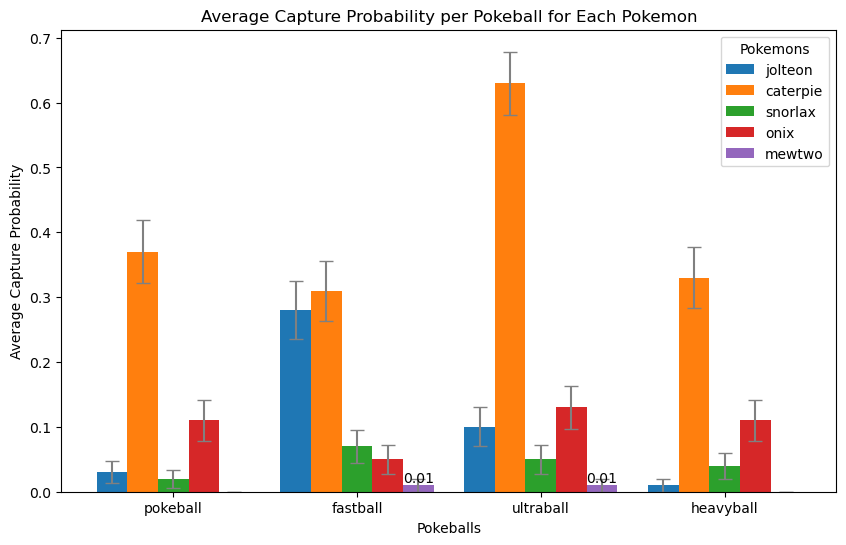

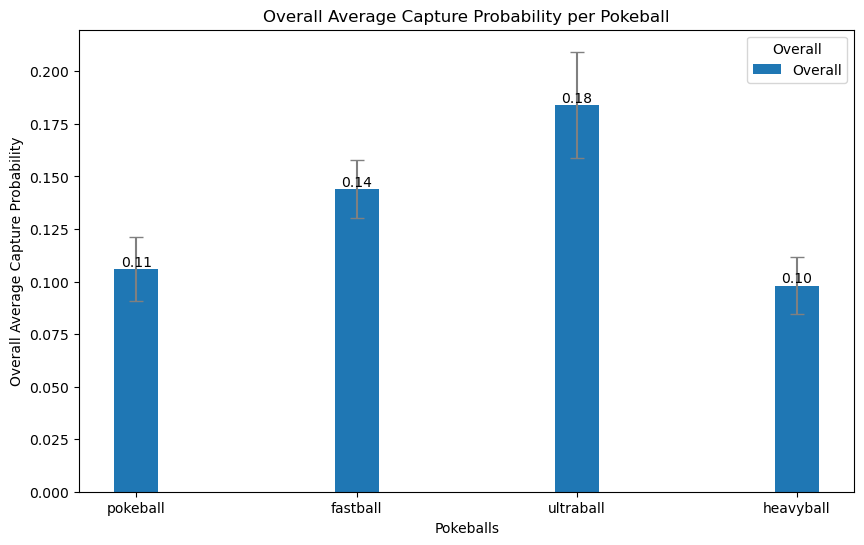

In [85]:
# Plot the original graph
df = pd.DataFrame(data)
std_devs_df = pd.DataFrame(std_devs_data)
bar_width = 0.2
group_width = bar_width * len(pokemons) + 0.2
index = np.arange(len(df['pokeballs'])) * group_width
plt.figure(figsize=(10, 6))
bars = []
for i, pokemon_name in enumerate(pokemons):
    bars.append(plt.bar(index + i * bar_width, df[pokemon_name], bar_width,
                        yerr=std_devs_df[pokemon_name]/np.sqrt(n_attempts), capsize=5, label=pokemon_name, ecolor='grey', alpha=1))

plt.xlabel('Pokeballs')
plt.ylabel('Average Capture Probability')
plt.title('Average Capture Probability per Pokeball for Each Pokemon')
plt.xticks(index + bar_width * (len(pokemons) - 1) / 2, df['pokeballs'])
plt.legend(title="Pokemons")

mewtwo_index = pokemons.index('mewtwo')
for bar in bars[mewtwo_index]:
    height = bar.get_height()
    if height != 0.00:
        plt.text(bar.get_x() + bar.get_width() / 2.0, height,
                 f'{height:.2f}', ha='center', va='bottom')
plt.show()

overall_means = df[pokemons].mean(axis=1)
overall_std_devs = df[pokemons].std(axis=1, ddof=1)

plt.figure(figsize=(10, 6))

plt.bar(df['pokeballs'], overall_means, bar_width,
        yerr=overall_std_devs/np.sqrt(n_attempts), capsize=5, label='Overall', ecolor='grey', alpha=1)

plt.xlabel('Pokeballs')
plt.ylabel('Overall Average Capture Probability')
plt.title('Overall Average Capture Probability per Pokeball')

plt.xticks(np.arange(len(df['pokeballs'])), df['pokeballs'])
plt.legend(title="Overall")

for i, mean in enumerate(overall_means):
    if mean != 0.00:
        plt.text(i, mean, f'{mean:.2f}', ha='center', va='bottom')
plt.show()

b) ¿Es cierto que algunas pokebolas son mas o menos efectivas dependiendo de propiedades intrınsecas de cada Pokemon? Justificar.

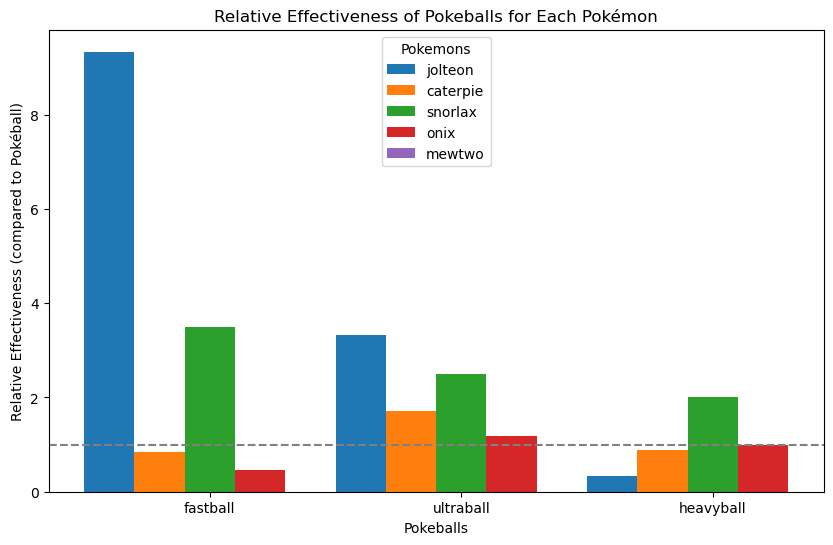

In [86]:
relative_effectiveness = {}

for pokemon_name in pokemons:
    relative_effectiveness[pokemon_name] = []
    base_effectiveness = df[df['pokeballs'] == 'pokeball'][pokemon_name].values[0]

    for ball in pokeballs:
        if ball == 'pokeball':
            continue
        effectiveness = df[df['pokeballs'] == ball][pokemon_name].values[0]
        if base_effectiveness == 0:
            relative_effectiveness[pokemon_name].append(np.nan)
        else:
            relative_effectiveness[pokemon_name].append(effectiveness / base_effectiveness)

relative_df = pd.DataFrame(relative_effectiveness)
relative_df['pokeballs'] = [ball for ball in pokeballs if ball != 'pokeball']

plt.figure(figsize=(10, 6))
index = np.arange(len(relative_df['pokeballs']))
bar_width = 0.2

for i, pokemon_name in enumerate(pokemons):
    plt.bar(index + i * bar_width, relative_df[pokemon_name], bar_width, label=pokemon_name)
plt.xlabel('Pokeballs')
plt.ylabel('Relative Effectiveness (compared to Pokéball)')
plt.title('Relative Effectiveness of Pokeballs for Each Pokémon')
plt.xticks(index + bar_width * (len(pokemons) - 1) / 2, relative_df['pokeballs'])
plt.axhline(1, color='grey', linestyle='--') 
plt.legend(title="Pokemons")
plt.show()